In [8]:
import geopandas as gpd
import streamlit as st
from streamlit_image_comparison import image_comparison
import matplotlib.pyplot as plt
import contextily as cx
import mapclassify
from matplotlib.lines import Line2D
import matplotlib.colors

from matplotlib_scalebar.scalebar import ScaleBar

In [3]:
# load maps
#access_score = gpd.read_parquet('./results/hexagons_access.parquet')
access_score = gpd.read_parquet('./results/hexagons_access_test.parquet')

In [4]:
local_crs = 2154

In [5]:
access_score.head()

,hex_id,X__index_level_0__,score_adults,score_seniors,geometry
0,8b1860868000fff,8b1860868000fff,556,293,"POLYGON ((-0.42719 49.18807, -0.42748 49.18793..."
1,8b1860868001fff,8b1860868001fff,667,393,"POLYGON ((-0.42678 49.18771, -0.42707 49.18757..."
2,8b1860868002fff,8b1860868002fff,516,263,"POLYGON ((-0.42783 49.18803, -0.42812 49.18789..."
3,8b1860868003fff,8b1860868003fff,661,362,"POLYGON ((-0.42742 49.18767, -0.42771 49.18753..."
4,8b1860868004fff,8b1860868004fff,584,307,"POLYGON ((-0.42697 49.18847, -0.42725 49.18833..."


In [ ]:
matplotlib.colors.ListedColormap(['red', 'royalblue', 'cyan', 'yellow', 'orange'])

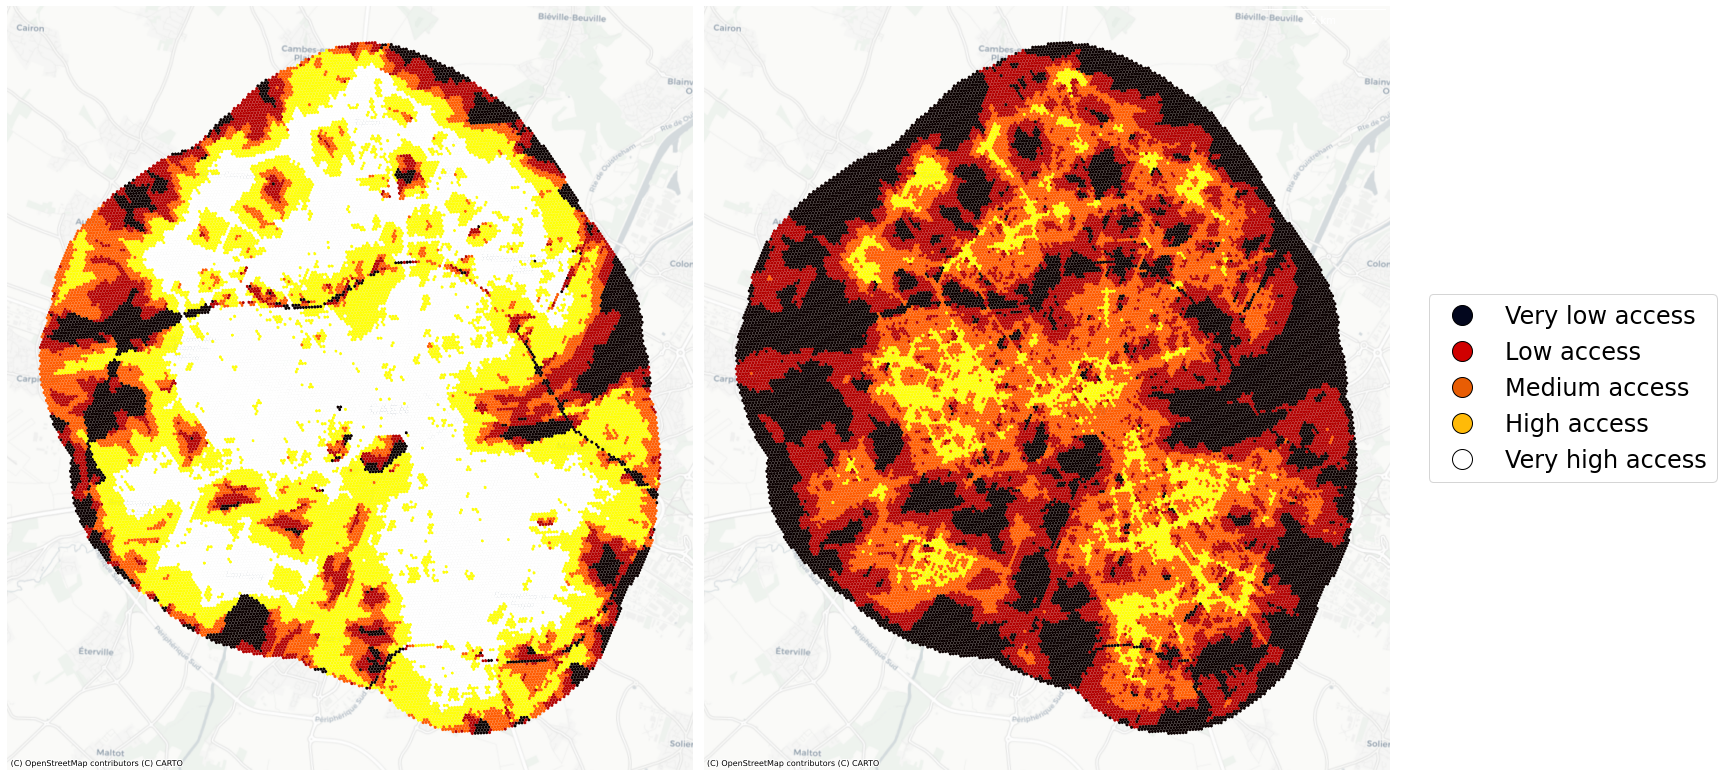

In [23]:
# define classification method
scores = ['score_adults','score_seniors']
pooled = mapclassify.Pooled(
    access_score[scores], k=5 # default (quintiles)
)

# generate custom legend
legend_elements = [Line2D([0],[0], marker='o', color = 'w', markerfacecolor='#03071e', label = 'Very low access', markersize = 20, markeredgecolor = 'black'),
                   Line2D([0],[0], marker='o', color = 'w', markerfacecolor='#d00000', label = 'Low access', markersize = 20, markeredgecolor = 'black'),
                   Line2D([0],[0], marker='o', color = 'w', markerfacecolor='#e85d04', label = 'Medium access', markersize = 20, markeredgecolor = 'black'),
                   Line2D([0],[0], marker='o', color = 'w', markerfacecolor='#ffba08', label = 'High access', markersize = 20, markeredgecolor = 'black'),
                   Line2D([0],[0], marker='o', color = 'w', markerfacecolor='#ffffff', label = 'Very high access', markersize = 20, markeredgecolor = 'black')]

# map
f, axs = plt.subplots(1,2, figsize = (24,24))

axs = axs.flatten()
scalebar = ScaleBar(dx=1,
                    location='upper right',
                    height_fraction=0.001,
                    color='white',
                    box_alpha=0.0
                    )

for i, s in enumerate(scores):
    access_score.to_crs(2154).plot(
        s,
        scheme = 'UserDefined',
        classification_kwds={ # Use global bins
            'bins': pooled.global_classifier.bins
        },
        ax = axs[i],
        cmap = 'hot'
        
    )
        
    cx.add_basemap(axs[i],
               crs=2154,
               source = cx.providers.CartoDB.Positron)
    
    axs[i].set_axis_off()
    axs[i].tick_params(labelsize = 20)
    axs[1].add_artist(scalebar)    
    axs[1].legend(handles = legend_elements, loc = 'center left', bbox_to_anchor=(1.04,0.5), fontsize = 24)
    # axs[0].set_title('Accessibility score for adults', fontsize = 16)
    # axs[1].set_title('Accessibility score for seniors', fontsize = 16)

plt.tight_layout()
plt.savefig('./figures/access_score_comparison.png', bbox_inches='tight')